# Equalização Local de Histograma

Processamento Digital de Imagens

Nomes: Igor Teixeira Machado RA: 769708
Rafael Vinícius Passador RA: 790036

\begin{equation}
s_k = T(k) = \frac{L-1}{MN}\sum_{j=0}^{k}n_j
\end{equation}

* pip install numpy
* python -m pip install -U matplotlib
* pip install opencv-python
* python -m pip install -U scikit-image

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage.exposure import equalize_adapthist

In [153]:
# Definicao das funcoes

def histogram_equalization(img):
    
    bins = range(0, 257)
    hist, _ = np.histogram(img, bins)    # Calcula quantos pixels possuem cada nível de intensidade

    # Calcula a transformação para cada nível de intensidade
    mn = sum(hist)
    c = 255./mn                           # O valor de (L-1)/MN
    out_intensity = np.zeros(256)
    for k in range(256):
        soma = 0
        for j in range(0, k+1):
            soma += hist[j]
        out_intensity[k] = c*soma
    
    # Aplica a transformação
    img_eq = np.zeros(img.shape)
    num_rows, num_cols = img.shape
    for row in range(num_rows):
        for col in range(num_cols):
            img_eq[row, col] = out_intensity[img[row, col]]
    
    return img_eq

def local_histogram_equalization(img, window_size=3):
    
    num_rows, num_cols = img.shape

    partition_rows = num_rows // window_size
    partition_cols = num_cols // window_size

    image_partition = np.zeros((partition_rows, partition_cols), dtype=np.uint16)
    
    i = 0
    j = 0
    s = partition_rows
    f = partition_cols
    
    for row in range(i, s):
        for col in range(j, f):
            if f == partition_cols * window_size:
                f += num_cols % window_size

            if row == s - 1 and col == f - 1:
                image_partition = histogram_equalization(image_partition)
                img[i : s, j : f] = image_partition[i : s, j : f]
                s += partition_rows
                f += partition_cols
                i += partition_rows
                j += partition_cols

                if col == num_cols - 1:
                    break

            else:
                image_partition[row, col] = img[row, col]
        
        if s == partition_rows * window_size:
                s += num_rows % window_size
        if row == num_rows - 1:
                break
    
    return img


def draw_hist(x_axis, input, figsize):
    fig, ax = plt.subplots(figsize=figsize)
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


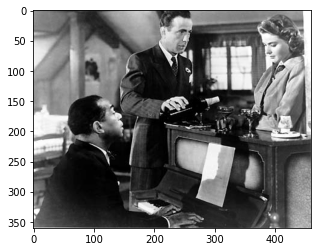

In [154]:
casablancaImg = cv2.imread('casablanca.tif', 0)
plt.imshow(casablancaImg, 'gray')

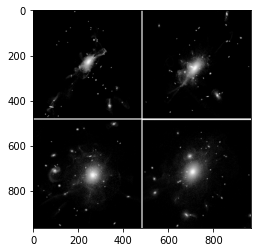

In [155]:
galaxy = cv2.imread('galaxy.tif', 0)
plt.imshow(galaxy, 'gray')

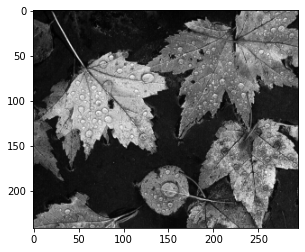

In [156]:
leaves = cv2.imread('leaves.tif', 0)
plt.imshow(leaves, 'gray')

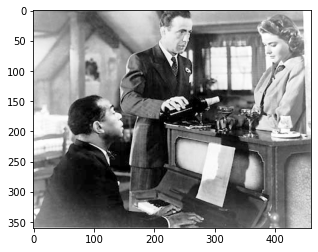

In [157]:
casablancaImgEq = histogram_equalization(casablancaImg)

plt.imshow(casablancaImgEq, 'gray')

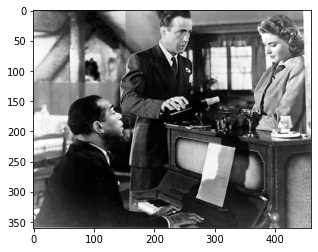

In [158]:
casablancaImgLocalEq = local_histogram_equalization(casablancaImg)

plt.imshow(casablancaImgLocalEq, 'gray')

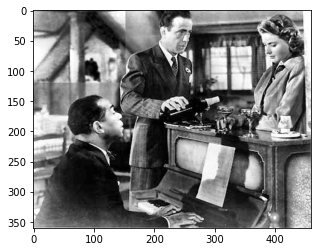

In [159]:
casablancaScikitLocalEq = equalize_adapthist(casablancaImg)
plt.imshow(casablancaScikitLocalEq, 'gray')

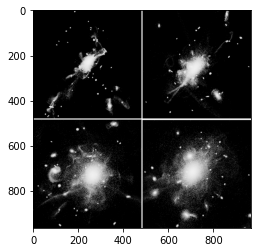

In [160]:
galaxyGlobalEq = histogram_equalization(galaxy)
plt.imshow(galaxyGlobalEq, 'gray')

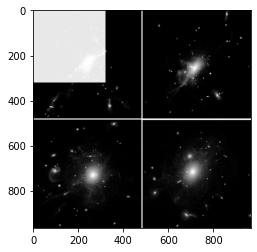

In [161]:
galaxylocalEq = local_histogram_equalization(galaxy)
plt.imshow(galaxylocalEq, 'gray')

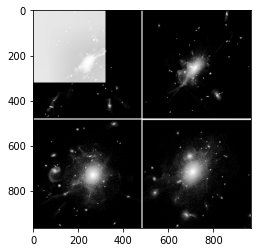

In [162]:
galaxyScikitLocalEq = equalize_adapthist(galaxy)
plt.imshow(galaxyScikitLocalEq, 'gray')

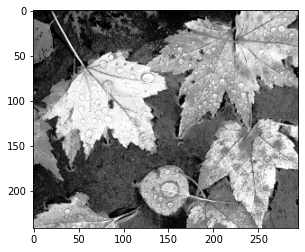

In [163]:
leavesGlobalEq = histogram_equalization(leaves)
plt.imshow(leavesGlobalEq, 'gray')

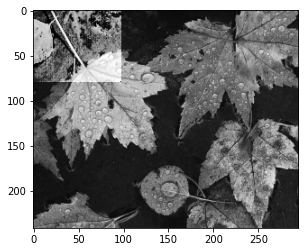

In [164]:
leavesLocalEq = local_histogram_equalization(leaves)
plt.imshow(leavesLocalEq, 'gray')

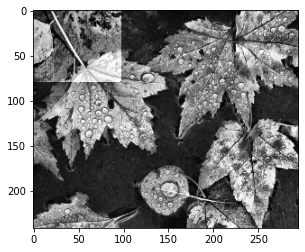

In [165]:
leavesScikitLocalEq = equalize_adapthist(leaves)
plt.imshow(leavesScikitLocalEq, 'gray')